In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
df = pd.read_csv('laptop.csv')
df

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

**Dropping the Irrelevant columns for Better Analysis**

In [ ]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [ ]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

**It is clearly visible from the above result that all columns have 30 missing values each.**

In [ ]:
print(df.shape)

(1303, 11)


**We have 1303 Rows and 11 Columns in Dataset**

In [ ]:
print(df.duplicated().sum())

58


**58 Duplicates Value are there in the Dataset**

**Now, Let's Drop the Duplicate Rows from Dataset**

In [ ]:
df=df.drop_duplicates()
df.shape

(1245, 11)

**It's clearly visible all the duplicate values are Dropped.**

In [ ]:
df.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

**We have 1 Null value in each column let's drop that also for better analysis**

In [ ]:
df=df.dropna()
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**Now Let's clean the data to more extent and check the unwanted values**

In [ ]:
unwanted_values=['?',float('nan'),'']
col = []
for column in df:
  if df[column].isin(unwanted_values).any():
    col.append(column)

print(col)

['Inches', 'Memory', 'Weight']


In [ ]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
print(df['Inches'].unique())

['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']


In [ ]:
print(df['Weight'].unique())

['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg' '1.35kg'
 '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg' '2kg'
 '2.65kg' '2.77kg' '3.2kg' '1.49kg' '2.4kg' '2.13kg' '2.43kg' '1.7kg'
 '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg' '1.63kg'
 '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg' '1.58kg'
 '1.85kg' '1.23kg' '2.16kg' '2.36kg' '7.2kg' '2.05kg' '1.32kg' '1.75kg'
 '0.97kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg' '2.03kg' '1.05kg'
 '5.4kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg' '1.12kg'
 '3.49kg' '3.35kg' '2.23kg' '?' '2.9kg' '4.42kg' '2.69kg' '2.37kg' '4.7kg'
 '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg' '2.24kg'
 '2.67kg' '4.1kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '5.8kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '8.23kg' '1.26kg'
 '1.84kg' '0.0002kg' '2.6kg' '2.26kg' '3.25kg' '1.59kg' '1.13kg' '1.42kg'
 '1.7

**These three Columns are Carrying Unwanted Values. Let's Drop them:**

In [ ]:
rows_to_drop=df.apply(lambda x:'?' in x.values,axis=1)
df = df[~rows_to_drop]

**Let's check again whether unwanted values are drop or not**

In [ ]:
unwanted_values=['?',float('nan'),'']
col = []
for column in df:
  if df[column].isin(unwanted_values).any():
    col.append(column)

print(col)

[]


In [ ]:
df.dtypes

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

**Let's Transform the Data now:-**

In [ ]:
df['Inches'] = df['Inches'].astype(float)
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)

In [ ]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

**All the Datatypes which are needed to be changed for the analysis is changed now**

**Let's do General Analysi for showing the Preferance of Customer with the help of Plotly**

In [ ]:
categorical_vars = ['Company', 'TypeName', 'OpSys' , 'Ram']

# Create interactive count plots for each categorical variable
for var in categorical_vars:
    fig = px.bar(df[var].value_counts().reset_index(),
                 x=df[var].value_counts().index,
                 y=var,
                 color=var,
                 labels={'index': var, var: 'Count'},
                 title=f'Count Plot of {var}',
                 template='plotly_dark')  # Dark theme for a more attractive look
    fig.update_layout(title_font_size=20, title_x=0.5)
    fig.show()

**Analysis from these plots:-**
1. **Lenovo** Laptop have the highest number of laptops and Fujitsu is the one which is **lowest**
2. **Notebook** type of laptop is maximum and **Netbook** is minimum.
3. **Window 10** covers almost 60 percent of market.
4. **8GB Ram** is the most selected varient.

In [ ]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                490
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880

Most Preferred Screen Resolution is **Full HD 1920x1080**

**Now let's move to Feature Engineering Part and Add more Features Column for better analysis**

**First adding IPS Screen Column to know whether laptop have it or not**

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS
31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,10602.7200,0
444,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,58554.7200,1
987,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.50,63349.9200,1
735,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,41505.1200,0
255,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.41,50562.7200,0
67,HP,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB SSD,Intel HD Graphics 400,Windows 10,1.44,12201.1200,0
66,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,AMD Radeon 520,Windows 10,1.86,23373.4032,0
44,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.7200,0
558,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,6,128GB SSD,AMD Radeon 530,Windows 10,1.91,30310.9920,1
436,HP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Windows 10,2.10,18488.1600,0


In [ ]:
ips_count = df['IPS'].value_counts()
# Create the figure
fig = go.Figure()
# Add bar trace for IPS count
fig.add_trace(go.Bar(
    x=ips_count.index.map({0: 'No', 1: 'Yes'}),
    y=ips_count.values,
    marker=dict(color='lightblue'),  # Set bar color
    opacity=0.8,  # Set opacity
    text=ips_count.values,
    textposition='auto',  # Show count on bars
    hoverinfo='text',
    hovertext=['No IPS: {}'.format(ips_count[0]), 'IPS: {}'.format(ips_count[1])]
))

# Update layout
fig.update_layout(
    title='Distribution of IPS Screens',
    xaxis=dict(title='IPS Screen'),
    yaxis=dict(title='Frequency'),
    plot_bgcolor='black',  # Set background color
    paper_bgcolor='black',  # Set paper color
    font=dict(color='white'),  # Set font color
    bargap=0.2,  # Set gap between bars
    margin=dict(l=50, r=50, t=80, b=50),  # Set margin
)

# Show plot
fig.show()


**Second, adding Touchscreen Screen Column to know whether laptop have it or not**

In [ ]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen
447,Dell,Workstation,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23,106187.040,0,0
1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,80612.640,0,0
251,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,95850.720,0,0
108,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210.720,0,0
372,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25,117162.720,1,0
1125,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.80,88924.320,1,1
1189,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.20,138474.720,1,0
1032,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,63499.104,0,0
523,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.63,36709.920,0,0
123,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,67718.880,0,0


**Now Differntiate X AND Y Resolution and Extract them:-**

In [ ]:
df['Screen']=df['ScreenResolution'].str.split().str[-1].str.split('x')
df['X_Res']=df['Screen'].str[0].astype(int)
df['Y_Res']=df['Screen'].str[1].astype(int)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,Screen,X_Res,Y_Res
1011,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,81997.9200,0,0,"[1920, 1080]",1920,1080
1074,Lenovo,Ultrabook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,91294.7472,1,1,"[1920, 1080]",1920,1080
1094,HP,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,85194.7200,0,0,"[1366, 768]",1366,768
475,Dell,Notebook,14.0,1366x768,Intel Core i3 6100U 2.3GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,1.79,39427.2000,0,0,"[1366, 768]",1366,768
1265,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,1,0,"[1920, 1080]",1920,1080


**Now for analysis we have to drop unwanted column which is created i.e Screen:**

In [ ]:
df.drop(['Screen'],axis=1,inplace=True)
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,X_Res,Y_Res
367,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.4,43103.52,1,0,1920,1080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   ScreenResolution  1241 non-null   object 
 4   Cpu               1241 non-null   object 
 5   Ram               1241 non-null   int64  
 6   Memory            1241 non-null   object 
 7   Gpu               1241 non-null   object 
 8   OpSys             1241 non-null   object 
 9   Weight            1241 non-null   float64
 10  Price             1241 non-null   float64
 11  IPS               1241 non-null   int64  
 12  TouchScreen       1241 non-null   int64  
 13  X_Res             1241 non-null   int64  
 14  Y_Res             1241 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 155.1+ KB


**Now Let's coorelate the Numerical Values to see the relationship-**

**Extracting only Numerical Columns from the Table:-**

In [ ]:
NC=df[df.select_dtypes(include=['int32','int64','float32','float64']).columns]
NC

,Inches,Ram,Weight,Price,IPS,TouchScreen,X_Res,Y_Res
0,13.3,8,1.37,71378.6832,1,0,2560,1600
1,13.3,8,1.34,47895.5232,0,0,1440,900
2,15.6,8,1.86,30636.0000,0,0,1920,1080
3,15.4,16,1.83,135195.3360,1,0,2880,1800
4,13.3,8,1.37,96095.8080,1,0,2560,1600
...,...,...,...,...,...,...,...,...
1269,15.6,4,2.20,38378.6496,0,0,1366,768
1270,14.0,4,1.80,33992.6400,1,1,1920,1080
1271,13.3,16,1.30,79866.7200,1,1,3200,1800
1272,14.0,2,1.50,12201.1200,0,0,1366,768


**Columns which have Numerical Values are Inches, Ram, Weight, Price, IPS, TouchScreen, X_Res, Y_Res**

**Let's check there Coorelation with Price**

In [ ]:
NC.corr()['Price']

Inches         0.042826
Ram            0.683478
Weight         0.177134
Price          1.000000
IPS            0.254603
TouchScreen    0.187464
X_Res          0.553740
Y_Res          0.550038
Name: Price, dtype: float64

**Analysis of Laptop Price Factors**


1. **RAM:**
   - We found a moderately strong positive correlation between RAM and laptop prices. This implies that laptops with higher RAM capacities tend to be priced higher.

2. **Screen Size (Inches):**
   - While there is a positive correlation between screen size and price, it's relatively weak. Larger screens may contribute slightly to higher prices, but the impact is not significant.

3. **Weight:**
   - The correlation between laptop weight and price is also weakly positive. Heavier laptops may have slightly higher prices, but this relationship is not strong.

4. **Display Type (IPS):**
   - Laptops featuring IPS (In-Plane Switching) displays exhibit a moderate positive correlation with prices. This indicates that laptops with IPS screens tend to command higher prices.

5. **Touchscreen:**
   - Touchscreen functionality shows a weak positive correlation with prices. While touchscreen laptops may have slightly higher prices, the effect is not substantial.

6. **Screen Resolution (X and Y):**
   - Both horizontal (X) and vertical (Y) screen resolutions demonstrate a moderate positive correlation with prices. Laptops with higher screen resolutions are likely to be priced higher.


In [ ]:
df['PPI']=(((df['X_Res']**2+df['Y_Res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,X_Res,Y_Res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,226.983005


In [ ]:
NC = df[df.select_dtypes(include = ['int32','int64','float32','float64']).columns]
NC.corr()["Price"]

Inches         0.042826
Ram            0.683478
Weight         0.177134
Price          1.000000
IPS            0.254603
TouchScreen    0.187464
X_Res          0.553740
Y_Res          0.550038
PPI            0.465409
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['ScreenResolution','Inches','X_Res','Y_Res'],inplace=True)
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005


**Let's Extract the Processor Now:-**

In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     125
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 6440HQ 2.6GHz      1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [ ]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))
df['Cpu_Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'AMD E-Series E2-9000e',
       'Intel Atom x5-Z8300', 'AMD E-Series E2-6110',
       'AMD A6-Series 9220', 'Intel Celeron Dual', 'AMD Ryzen 1700',
       'Intel Pentium Quad', 'AMD FX 9830P', 'AMD E-Series 6110',
       'Intel Xeon E3-1505M', 'AMD E-Series 9000e',
       'AMD A10-Series A10-9620P', 'AMD A6-Series A6-9220',
       'AMD A10-Series 9600P', 'AMD A8-Series 7410',
       'AMD A12-Series 9720P', 'Intel Celeron Quad', 'AMD Ryzen 1600',
       'Intel Atom x5-Z8350', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Intel Atom x5-Z8550',
       'Samsung Cortex A72&A53', 'AMD E-Series 9000',
       'AMD A9-Series 9410'], dtype=object)

In [ ]:
def processortype(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text

  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

df['Cpu_Name'] = df['Cpu_Name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5


In [ ]:
df.drop(['Cpu'],axis=1,inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu_Name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5


In [ ]:
cpu_counts = df['Cpu_Name'].value_counts().reset_index()
cpu_counts.columns = ['Cpu_Name', 'Count']

# Create a bar plot
fig = px.bar(cpu_counts, x='Cpu_Name', y='Count', color='Cpu_Name',
             title='Distribution of CPU Names',
             labels={'Cpu_Name': 'CPU Name', 'Count': 'Count'},
             template='plotly_dark')  # Set template to 'plotly_dark' for black background

# Update layout for better readability
fig.update_layout(xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14),
                  xaxis_tickangle=-45, xaxis_tickfont=dict(size=10),
                  yaxis_tickfont=dict(size=10))

# Show the plot
fig.show()

**Most choosed processor is Intel Core i7**

**Let's see the RAM effect on price and which is the most preffered option**

In [ ]:
# Create a DataFrame with the RAM sizes and their counts
ram_counts = df['Ram'].value_counts().reset_index()
ram_counts.columns = ['Ram', 'Count']

# Create a bar plot
fig = px.bar(ram_counts, x='Ram', y='Count', color='Ram',
             title='Distribution of RAM Sizes',
             labels={'Ram': 'RAM Size', 'Count': 'Count'},
             template='plotly_dark',)  # Set template to 'plotly_dark' for black background

# Update layout for better readability
fig.update_layout(xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14),
                  xaxis=dict(tickvals=[0, 4, 8, 12, 16, 20, 24, 32]),  # Set desired tick values
                  xaxis_tickangle=-45, xaxis_tickfont=dict(size=10),
                  yaxis_tickfont=dict(size=10))

# Show the plot
fig.show()

**Most Preferred one is 8 GB Version**

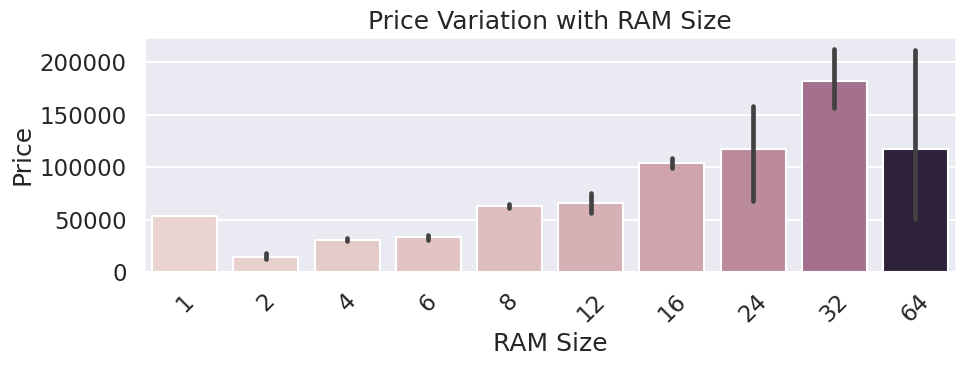

In [ ]:
sns.set_style("darkgrid")
sns.set_context("talk")

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x=df['Ram'], y=df['Price'], hue=df['Ram'], dodge=False, legend=False)

# Add labels and title
plt.xlabel('RAM Size')
plt.ylabel('Price')
plt.title('Price Variation with RAM Size')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**We can analyze from the above Barplot that as Ram is increasing Price is also increasing**

**Now feature engineering on Memory column**

In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        399
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new_df = df['Memory'].str.split("+",n=1,expand=True)
new_df

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


In [ ]:
df['Sorted_Memory'] = new_df[0].str.strip()

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu_Name,Sorted_Memory
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD


In [ ]:
def applychanges(value):
    df['MemoryType_'+value] = df['Sorted_Memory'].apply(lambda x: 1 if value in x else 0)

# List of values to apply the changes
list_to_apply = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']

# Apply changes for each value in the list
for value in list_to_apply:
    applychanges(value)

# Display the first few rows of the DataFrame to see the changes
df.head()



,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu_Name,Sorted_Memory,MemoryType_HDD,MemoryType_SSD,MemoryType_Hybrid,MemoryType_FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [ ]:
df['Sorted_Memory'] = df['Sorted_Memory'].str.replace(r'\D','',regex=True)
df['Sorted_Memory'].value_counts()

Sorted_Memory
256     493
1000    233
128     171
512     134
500     121
32       42
2000     16
64       14
16       10
180       4
240       1
8         1
508       1
Name: count, dtype: int64

In [ ]:
df['Sorted_Memory_2'] = new_df[1]
df.head()
df['Sorted_Memory_2'].unique()

array([None, '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1000 Hybrid'], dtype=object)

In [ ]:
def applychanges1(value):
    df['MemoryType2_'+value] = df['Sorted_Memory_2'].apply(lambda x: 1 if value in x else 0)

# List of values to apply the changes
list_to_apply1 = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
df['Sorted_Memory_2'] = df['Sorted_Memory_2'].fillna("0")

# Apply changes for each value in the list
for value in list_to_apply1:
    applychanges1(value)


df['Sorted_Memory_2'] = df['Sorted_Memory_2'].str.replace(r'\D','',regex=True)
df['Sorted_Memory_2'].value_counts()



Sorted_Memory_2
0       1037
1000     183
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [ ]:
df['Sorted_Memory']=df['Sorted_Memory'].astype('int')
df['Sorted_Memory_2']=df['Sorted_Memory_2'].astype('int')
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,...,Sorted_Memory,MemoryType_HDD,MemoryType_SSD,MemoryType_Hybrid,MemoryType_FlashStorage,Sorted_Memory_2,MemoryType2_HDD,MemoryType2_SSD,MemoryType2_Hybrid,MemoryType2_FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,...,128,0,1,0,0,0,0,0,0,0


In [ ]:
df["HDD"]=df["Sorted_Memory"]*df["MemoryType_HDD"]+df["Sorted_Memory_2"]*df["MemoryType2_HDD"]
df["SSD"]=df["Sorted_Memory"]*df["MemoryType_SSD"]+df["Sorted_Memory_2"]*df["MemoryType2_SSD"]
df["Hybrid"]=df["Sorted_Memory"]*df["MemoryType_Hybrid"]+df["Sorted_Memory_2"]*df["MemoryType2_Hybrid"]
df["FlashStorage"]=df["Sorted_Memory"]*df["MemoryType_FlashStorage"]+df["Sorted_Memory_2"]*df["MemoryType2_FlashStorage"]


In [ ]:
df.drop(columns=['Sorted_Memory','Sorted_Memory_2','MemoryType_HDD','MemoryType_SSD','MemoryType_Hybrid','MemoryType_FlashStorage'
,'MemoryType2_HDD','MemoryType2_SSD','MemoryType2_Hybrid','MemoryType2_FlashStorage'],inplace=True)

In [ ]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu_Name,HDD,SSD,Hybrid,FlashStorage
1156,MSI,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,79536.384,0,0,127.335675,Intel Core i7,1000,256,0,0
14,Apple,Ultrabook,8,Intel HD Graphics 615,macOS,0.92,67260.672,1,0,226.415547,Other Intel Processor,0,256,0,0
819,Dell,Notebook,4,Intel HD Graphics 520,Windows 10,1.76,40226.400,0,0,111.935204,Intel Core i5,500,0,0,0
643,Asus,Gaming,8,Nvidia GeForce GTX 1050 Ti,No OS,2.50,62284.320,1,0,141.211998,Intel Core i7,1000,0,0,0
1134,Acer,Notebook,4,Nvidia GeForce 940MX,Windows 10,2.23,32820.480,0,0,141.211998,Intel Core i5,1000,0,0,0


In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      269
Intel HD Graphics 520      177
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
df.loc[1]['Gpu'].split()[0]

'Intel'

In [ ]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df['Gpu_brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [ ]:
df = df[df['Gpu_brand']!='ARM']

In [ ]:
df=df.drop(columns=['Gpu'])
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu_Name,HDD,SSD,Hybrid,FlashStorage,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,0,128,0,0,Intel


In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1019
No OS             63
Linux             57
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [ ]:
def setcategory(text):

  if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
      return 'Windows'
  elif text == 'macOS' or text == 'Mac OS X':
      return 'Mac'
  else:
      return 'Other'

df['OpSys'] = df['OpSys'].apply(lambda text:setcategory(text))

In [ ]:
df['Price']=np.log(df['Price'])

In [ ]:
DF_copy = df

In [ ]:
df.dtypes


Company          object
TypeName         object
Ram               int64
OpSys            object
Weight          float64
Price           float64
IPS               int64
TouchScreen       int64
PPI             float64
Cpu_Name         object
HDD               int64
SSD               int64
Hybrid            int64
FlashStorage      int64
Gpu_brand        object
dtype: object

In [ ]:
Numeric_Columns = df[df.select_dtypes(include = ['int32','int64','float32','float64']).columns]
Numeric_Columns

,Ram,Weight,Price,IPS,TouchScreen,PPI,HDD,SSD,Hybrid,FlashStorage
0,8,1.37,11.175755,1,0,226.983005,0,128,0,0
1,8,1.34,10.776777,0,0,127.677940,0,0,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256,0,0
3,16,1.83,11.814476,1,0,220.534624,0,512,0,0
4,8,1.37,11.473101,1,0,226.983005,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...
1269,4,2.20,10.555257,0,0,100.454670,500,0,0,0
1270,4,1.80,10.433899,1,1,157.350512,0,128,0,0
1271,16,1.30,11.288115,1,1,276.053530,0,512,0,0
1272,2,1.50,9.409283,0,0,111.935204,0,0,0,0


In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu_Name,HDD,SSD,Hybrid,FlashStorage,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,11.175755,1,0,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,0,0,Intel
2,HP,Notebook,8,Other,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,11.814476,1,0,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,11.473101,1,0,226.983005,Intel Core i5,0,256,0,0,Intel


In [ ]:
df=df.drop(columns=['Hybrid','FlashStorage'],axis=1,inplace=True)




**Now move towards Training and Testing the Data**

In [ ]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,VotingRegressor
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

df=pd.read_csv('laptop.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize an empty dictionary
le = {}

# Iterate over columns except 'Price_euros' column
for col in set(df.columns).difference({'Price_euros'}):
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])


# Drop the first three columns
df = df.iloc[:, 3:]

# Print the DataFrame after dropping columns
print(df)



      TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  Gpu  OpSys  \
0            4       7                23   65    9       4   58      8   
1            4       7                 1   63    9       2   51      8   
2            3      14                 8   74    9      16   53      4   
3            4      13                25   85    1      29    9      8   
4            4       7                23   67    9      16   59      8   
...        ...     ...               ...  ...  ...     ...  ...    ...   
1298         0      10                13   89    6       4   47      5   
1299         0       7                19   89    1      29   47      5   
1300         3      10                 0   34    4      35   40      5   
1301         3      14                 0   89    8      10   21      5   
1302         3      14                 0   34    6      26   40      5   

      Weight  Price  
0         39    517  
1         36    338  
2         75    164  
3         72    732  
4

In [ ]:
#x=df.drop('Price_euros',axis=1)
#y=df.Price_euros
x = df.iloc[:, -4:-3].values
y = df.iloc[:, -1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([331.93137679, 326.93403613, 476.854256  , 441.87287137,
       361.91542077, 446.87021203, 361.91542077, 331.93137679,
       301.94733282, 361.91542077, 331.93137679, 361.91542077,
       361.91542077, 386.90212408, 456.86489335, 491.84627799,
       361.91542077, 361.91542077, 471.85691534, 331.93137679,
       132.0377503 , 296.94999216, 476.854256  , 361.91542077,
       456.86489335, 132.0377503 , 331.93137679, 456.86489335,
       361.91542077, 526.82766263, 496.84361865, 361.91542077,
       361.91542077, 361.91542077, 361.91542077, 331.93137679,
       216.99254156, 646.76383853, 162.02179427, 331.93137679,
       361.91542077, 331.93137679, 361.91542077, 331.93137679,
       401.89414607, 127.04040963, 361.91542077, 331.93137679,
       326.93403613, 356.91808011, 471.85691534, 481.85159667,
       456.86489335, 471.85691534, 646.76383853, 471.85691534,
       491.84627799, 471.85691534, 471.85691534, 361.91542077,
       491.84627799, 541.81968461, 496.84361865, 601.78

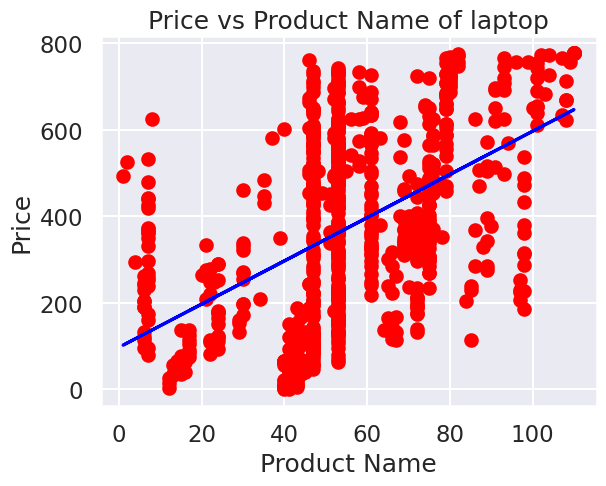

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

**It is clearly visible that datapoints are far away from the Line so this Algo is not Apt for this dataset.**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision= 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[331.931 104.   ]
 [326.934 243.   ]
 [476.854 415.   ]
 ...
 [361.915  68.   ]
 [491.846 561.   ]
 [361.915 318.   ]]


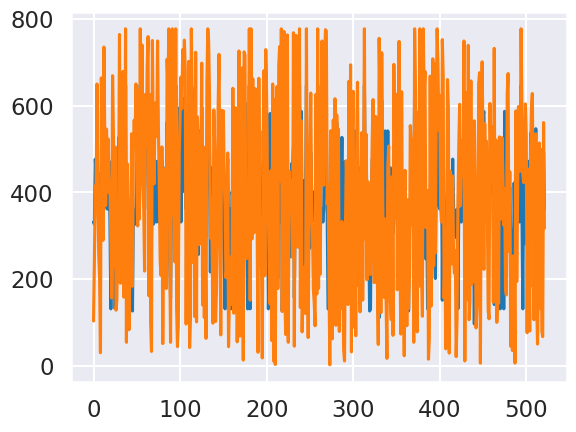

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

**Here we have applied a multiple linear regression model to the dataset. We can visualize that in some regions the orange graph lines are steeper than the blue graph lines. This proves that the multiple regression model fits better than the linear regression model but still, it is not the best-fitted plot because some predictions have crossed the test values.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 95, random_state = 78)
regressor.fit(x, y)

RandomForestRegressor(n_estimators=95, random_state=78)

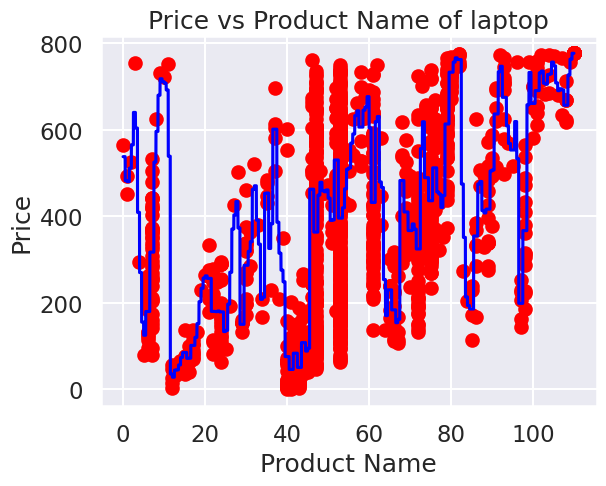

In [ ]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

**This random forest prediction is more accurate and covers most of the data points. The accuracy of this model is 96 percent. So this model fits far better than the previous two models.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 45)
regressor.fit(x,y)

DecisionTreeRegressor(random_state=45)

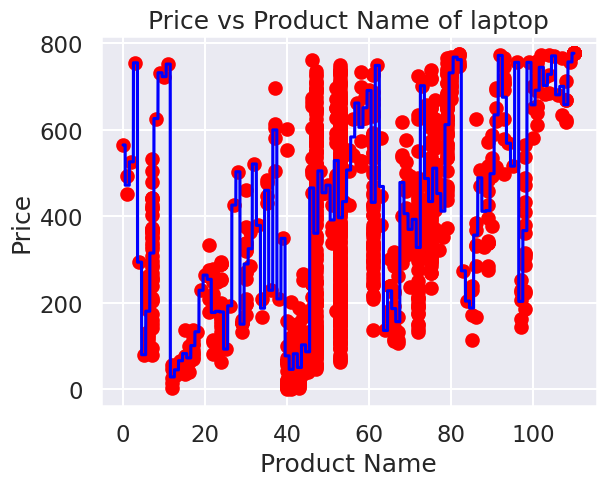

In [ ]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

**In the decision tree model, the accuracy is very high than linear and multiple regression. So we can that this model is also one of the best-fitted models.**

In [1890]:
def get_mae_random(max_leaf_nodes,x_train,x_test, y_train, y_test ):
    model1 = RandomForestRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model1.fit(x_train,y_train)
    model1_preds = model1.predict(x_test)
    print("R2 score: %.2f"%(r2_score(y_test,model1_preds)))
    mae = mean_absolute_error(y_test, model1_preds)
    return (mae)
for max_leaf_nodes in [5,10,20,50,100,200,300, 500]:
    mae=get_mae_random(max_leaf_nodes,x_train,x_test,y_train,y_test)
    print("Max leaf nodes: %d \t\t MAE: %d\n"%(max_leaf_nodes, mae))

R2 score: 0.41
Max leaf nodes: 5 		 MAE: 137

R2 score: 0.48
Max leaf nodes: 10 		 MAE: 127

R2 score: 0.51
Max leaf nodes: 20 		 MAE: 121

R2 score: 0.53
Max leaf nodes: 50 		 MAE: 115

R2 score: 0.53
Max leaf nodes: 100 		 MAE: 115

R2 score: 0.53
Max leaf nodes: 200 		 MAE: 115

R2 score: 0.53
Max leaf nodes: 300 		 MAE: 115

R2 score: 0.53
Max leaf nodes: 500 		 MAE: 115



**So, In end as per my Analysis Random Forest Machine Learning Test is giving best result and best suited for this dataset.**

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok


In [ ]:
!ngrok authtoken 2fiOEXbGiD2zj871DtnwYvqHOpa_4Rtrz8kiETXSFEwVED9fE


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Set the port number where your Streamlit app will run
port = 8501

# Start ngrok
public_url = ngrok.connect(port)
print('Ngrok Tunnel:', public_url)

# Keep the connection open



Ngrok Tunnel: NgrokTunnel: "https://c6ce-34-118-199-72.ngrok-free.app" -> "http://localhost:8501"


In [1889]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.118.199.72:8501

  Stopping...
  Stopping...
Exception ignored in atexit callback: <function shutdown at 0x7d0846327880>
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 2178, in shutdown
    h = wr()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/bootstrap.py", line 55, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/server.py", line 405, in stop
    self._runtime.stop()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/runtime.py", line 315, in stop
    async_objs.eventloop.call_soon_threadsafe(stop_on_eventloop)
  File "/usr/lib/python3.10/asyncio/base_events.py", line 798, in call_soon_threadsafe
    self._check_closed()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 515, in _check_closed
    raise RuntimeError('Event loop